In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv' ,encoding ='unicode_escape')

In [3]:
df.shape

(11251, 14)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [7]:
df.drop(['Status', 'Unnamed'],axis=1,inplace=True)

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [10]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df[df.isnull().any(axis=1)]

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [12]:
df['Amount']= df.groupby('Product_Category')['Amount'].transform(lambda x:x.fillna(x.mean()))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [14]:
df[(df['User_ID']==1002092) & (df['Product_ID']=='P00273442')]

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,61,0,Maharashtra,Western,IT Sector,Auto,1,20191.855567


In [15]:
df['Amount']=df['Amount'].astype('int')

In [16]:
df[(df['User_ID']==1002092) & (df['Product_ID']=='P00273442')]

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,61,0,Maharashtra,Western,IT Sector,Auto,1,20191


In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [18]:
 df.rename(columns={"Marital_Status":"Married"})

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [21]:
def categorize_age(age):
    if age<=17:
        return '0-17'
    elif age<=25:
        return '18-25'
    elif age<=35:
        return '26-35'
    elif age<=45:
        return '36-45'
    elif age<=50:   
        return '46-50'
    elif age<=55:   
        return '51-55'
    else:
        return '55+'

In [22]:
df['Age Group']= df['Age'].apply(categorize_age)

In [23]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age Group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,26-35
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,26-35
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,26-35
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,0-17
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,26-35


In [24]:
df.drop('Age', axis=1, inplace=True)

In [25]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age Group
0,1002903,Sanskriti,P00125942,F,0,Maharashtra,Western,Healthcare,Auto,1,23952,26-35
1,1000732,Kartik,P00110942,F,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,26-35
2,1001990,Bindu,P00118542,F,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,26-35
3,1001425,Sudevi,P00237842,M,0,Karnataka,Southern,Construction,Auto,2,23912,0-17
4,1000588,Joni,P00057942,M,1,Gujarat,Western,Food Processing,Auto,2,23877,26-35


##EXPLORATORY DATA ANALYSIS

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age Group'],
      dtype='object')

GENDER

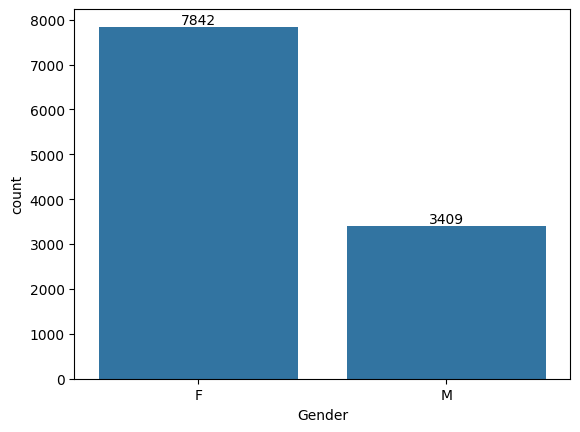

In [28]:
ax= sns.countplot(x= 'Gender' , data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [29]:
sales_gen= df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

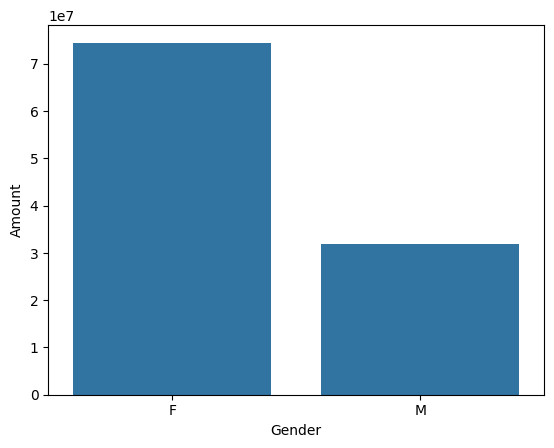

In [30]:
sns.barplot(x='Gender' , y= 'Amount' ,data=sales_gen)

AGE

<Axes: xlabel='Age Group', ylabel='count'>

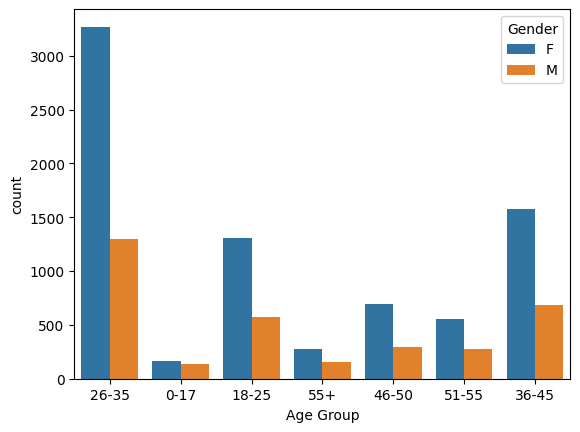

In [31]:
sns.countplot(data=df, x='Age Group' , hue='Gender')

In [32]:
sales_age= df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

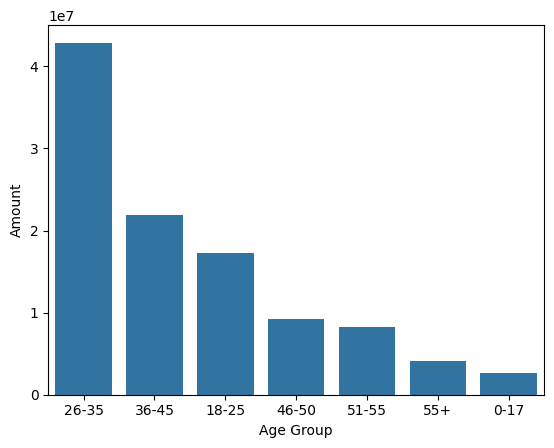

In [33]:
sns.barplot(x='Age Group' ,y='Amount', data=sales_age)

STATE

In [34]:
sales_state= df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

<Axes: xlabel='State', ylabel='Orders'>

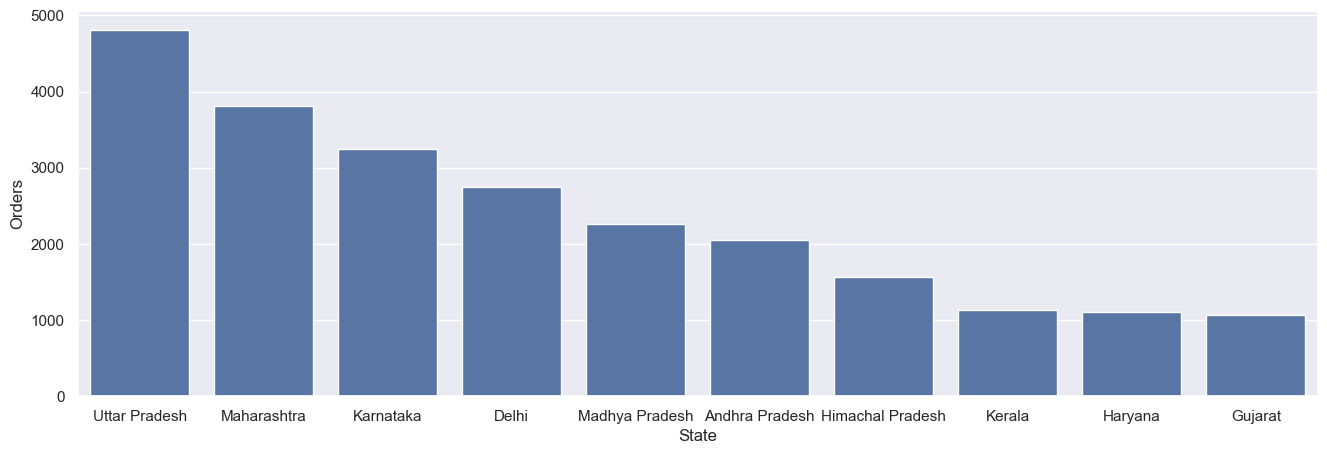

In [35]:
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data= sales_state, x= 'State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

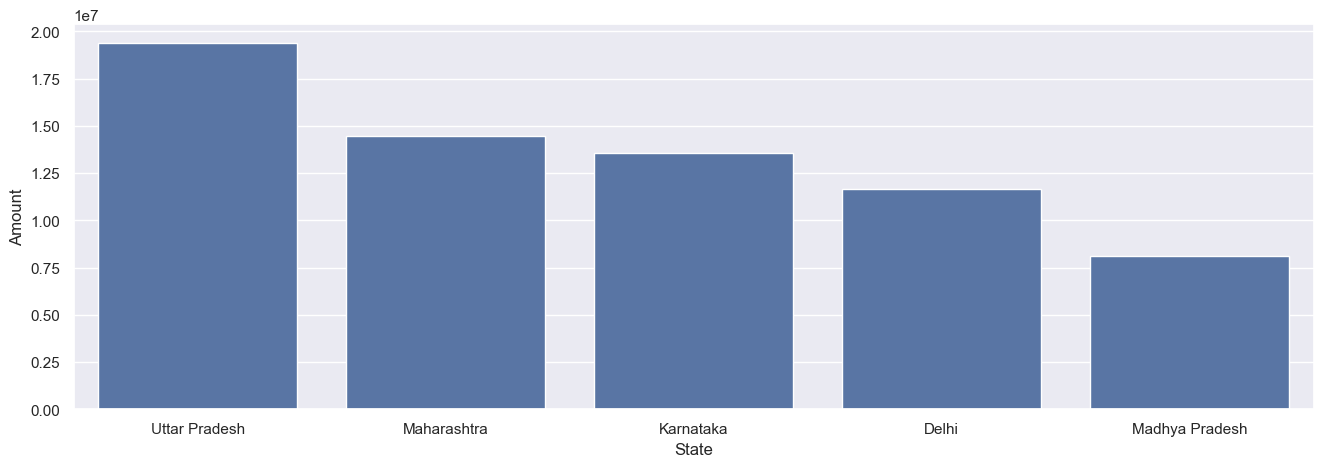

In [37]:
sales_state= df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data= sales_state, x= 'State',y='Amount')

MARITAL STATUS

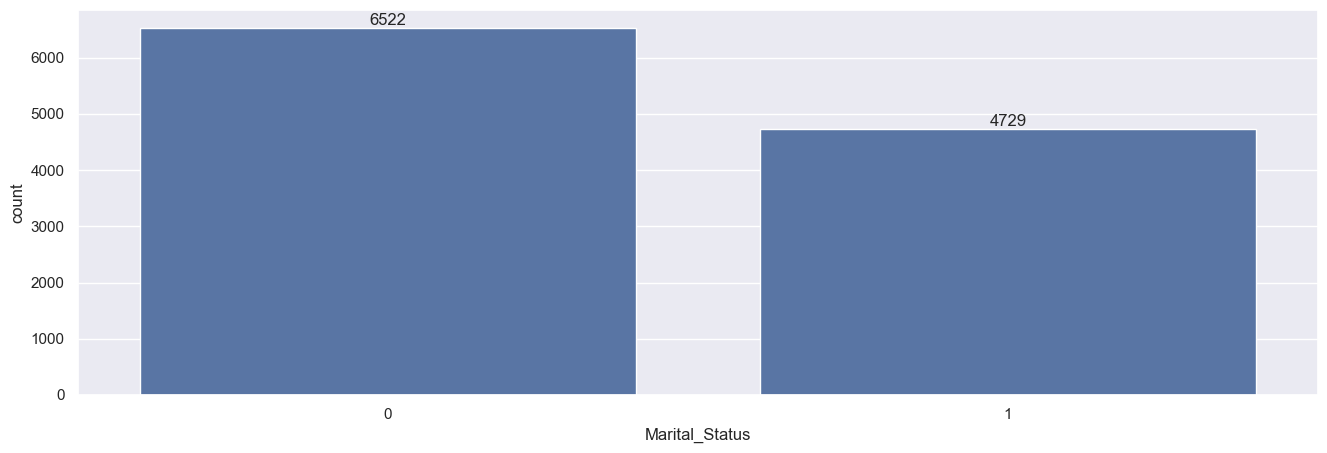

In [38]:
ax= sns.countplot(x= 'Marital_Status' , data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

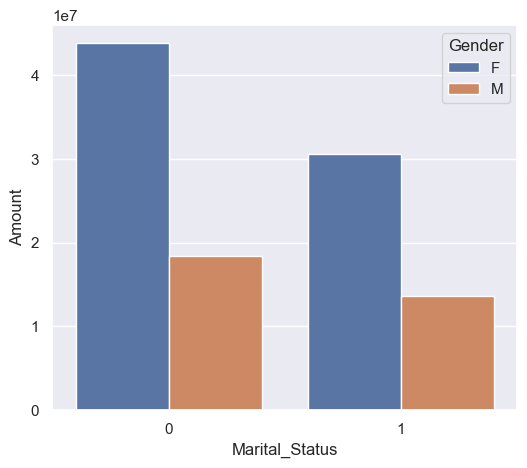

In [41]:
sales_state= df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data= sales_state, x= 'Marital_Status',y='Amount', hue='Gender')

OCCUPATION

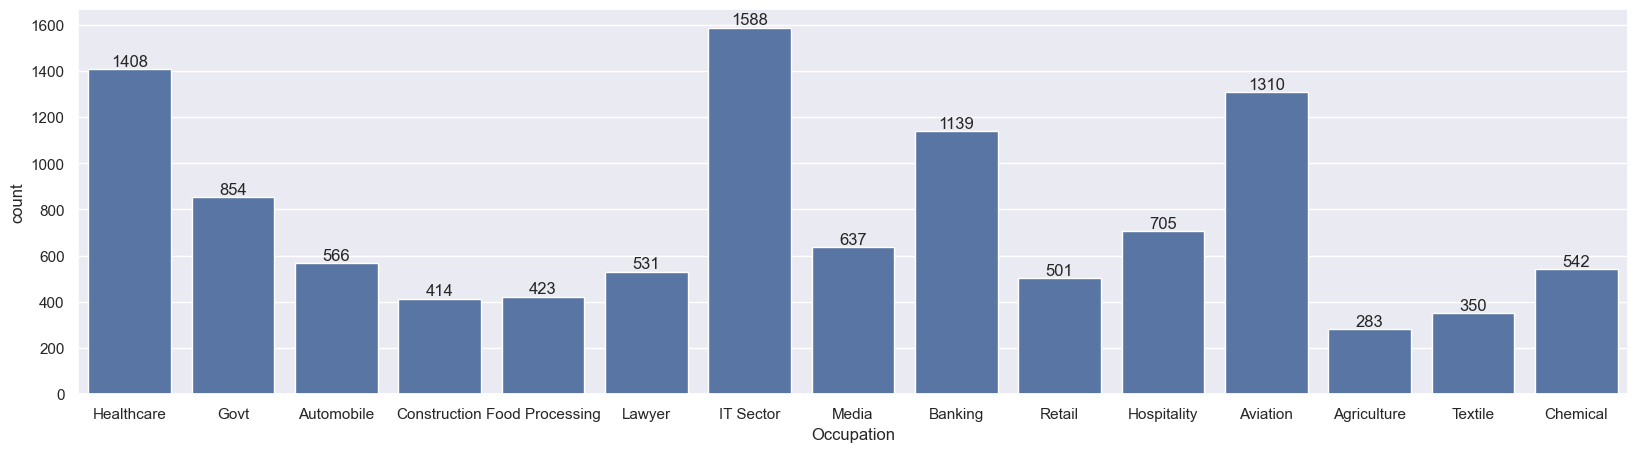

In [44]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(x= 'Occupation' , data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

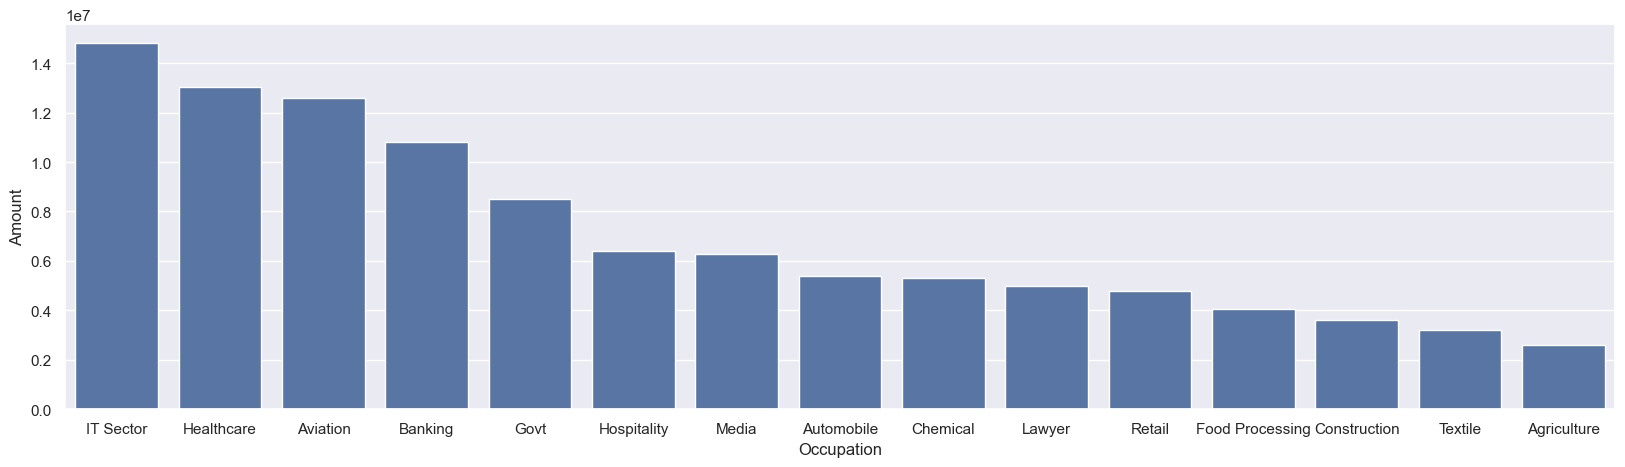

In [46]:
sales_state= df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x= 'Occupation',y='Amount')

PRODUCT CATEGORY

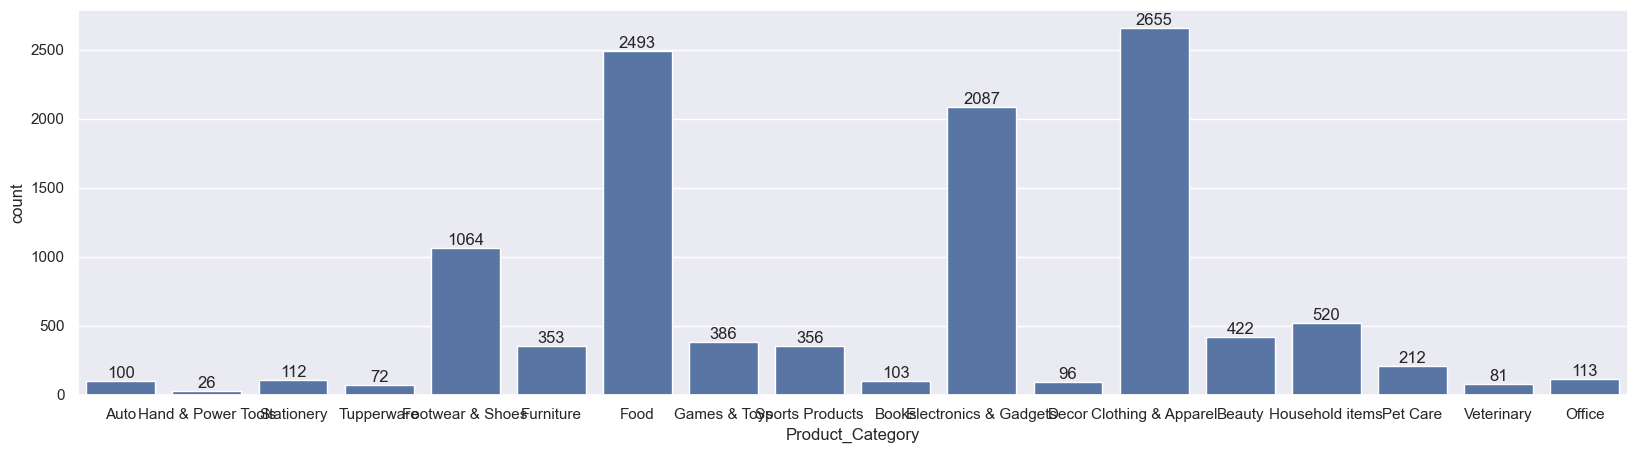

In [47]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(x= 'Product_Category' , data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

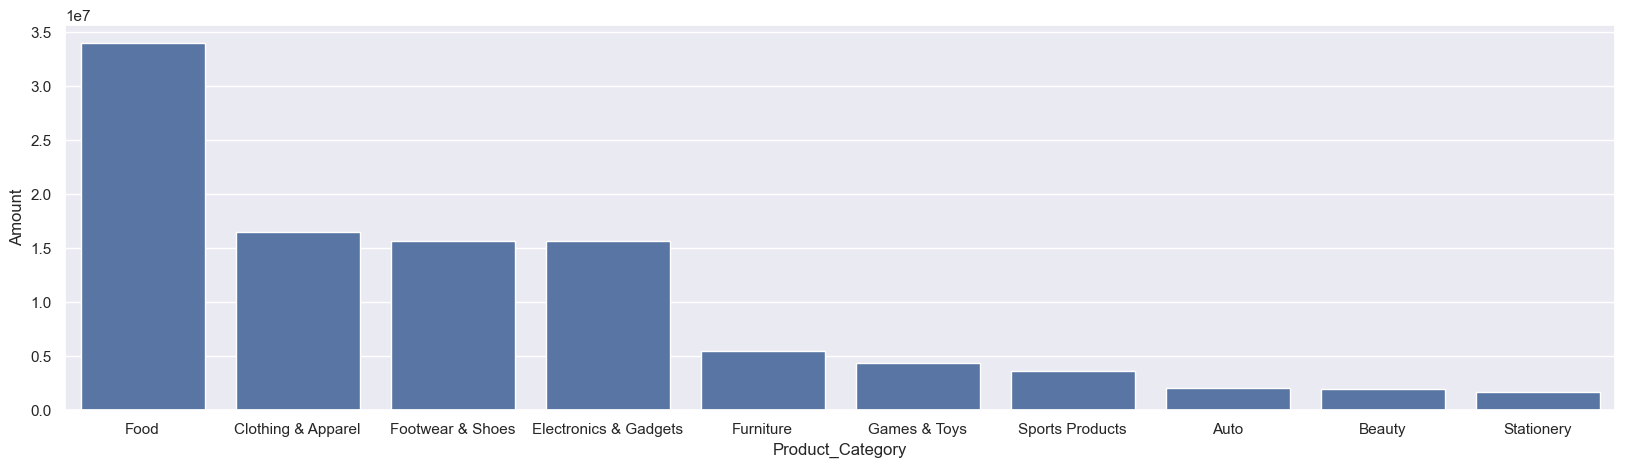

In [48]:
sales_state= df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x= 'Product_Category',y='Amount')

PRODUCT ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

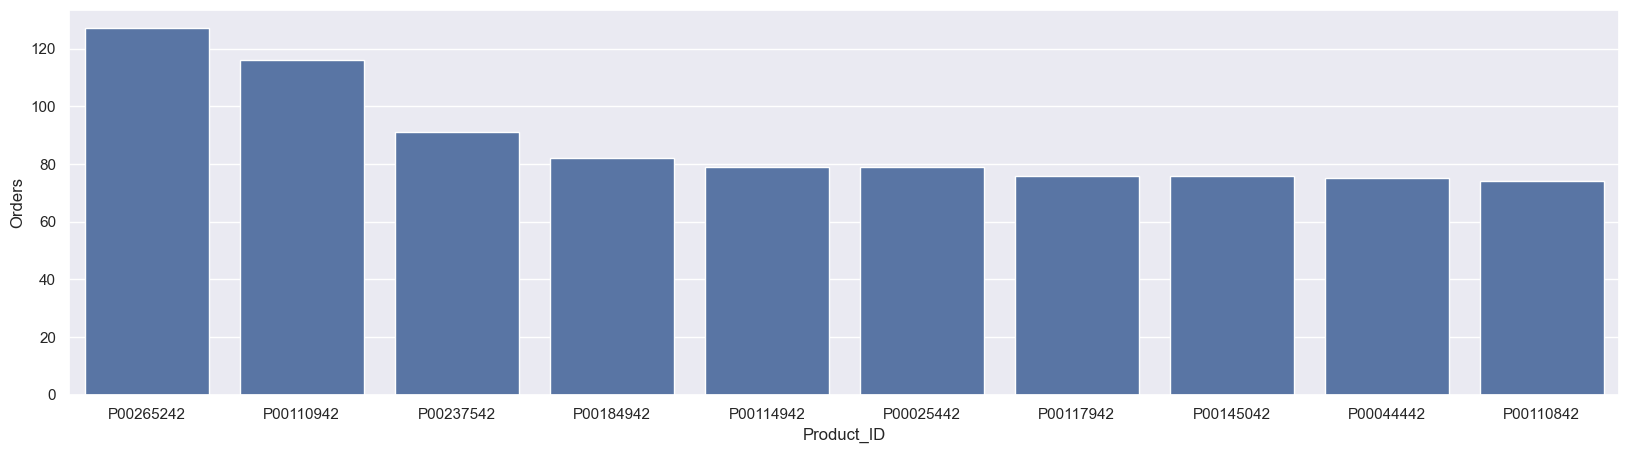

In [49]:
sales_state= df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x= 'Product_ID',y='Orders')

<Axes: xlabel='Product_ID'>

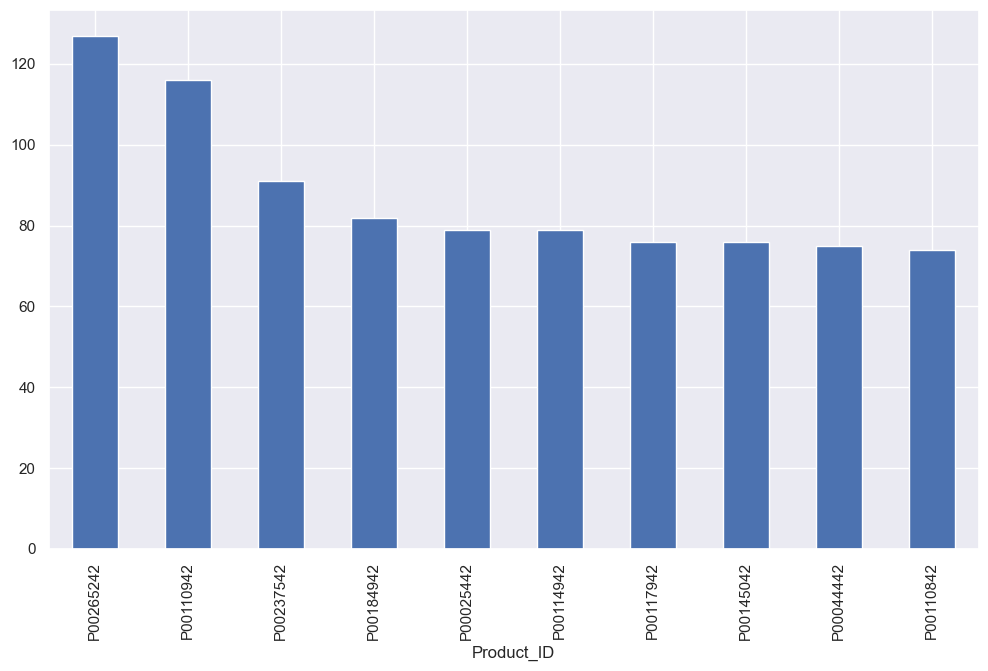

In [50]:
# top 10 most sold products

fig1, ax1= plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

Married women age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT,Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.